# Transmission of Air with $O_2$ absorption
==============================================================


The purpose is to calculate the transmission of air due to $O_2$ component at OHP site.

- author : Sylvie Dagoret-Campagne
- date :May  2nd 2017

In [1]:
import numpy as np
import pandas as pd

# Set up matplotlib and use a nicer set of plot parameters
#%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt

%matplotlib inline

#import matplotlib as mpl

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Initialisation

## Constants

In [3]:
Pa_to_Atm = 0.00000986923267
hPa_to_Atm=Pa_to_Atm*100  # libRadTran provides pressure in hPa
Atm_to_Pa = 1.01325*1e5 
Atm_to_hPa = 1.01325*1e3 

In [4]:
m_to_cm=100.

## Initialize Hitran/Hapi

In [5]:
from hapi import *

HAPI version: 1.1.0.6
To get the most up-to-date version please check http://hitran.org/hapi


In [6]:
db_begin('data')

Using data

CO2
                     Lines parsed: 3831
H2O
                     Lines parsed: 110080
NO2
                     Lines parsed: 5873
O
                     Lines parsed: 80101
O2
                     Lines parsed: 1180
O3
                     Lines parsed: 16584


## Initialisation of atmosphere at OHP

In [7]:
atm_ground_file='atm_OHP_ground.csv'
atm_groundsum_file='atm_OHP_groundsum.csv'

In [8]:
df=pd.read_csv(atm_ground_file)

In [9]:
df  # Pressure in hPa, T in Kelvin, densities in molecules per cm^3

,Unnamed: 0,P,T,Air,O2,O3,PWV,CO2,NO2
0,afglus_grd,937.22595,283.98,2.390570e+19,5.000690e+18,6.785990e+11,1.592780e+17,7.895830e+15,550316000.0
1,afglmw_grd,937.82373,269.93,2.516510e+19,5.262860e+18,7.031330e+11,9.457420e+16,8.309770e+15,579166000.0
2,afglms_grd,939.39349,291.28,2.335970e+19,4.886270e+18,7.539820e+11,3.629170e+17,7.715160e+15,537723000.0


In [10]:
d_O2_us=df['O2'][0]  # molec/cm^3 : H2O density  for US standard atmosphere at ground
d_O2_mw=df['O2'][1] # molec/cm^3 : H2O density  for Mid latitude winter atmosphere at ground
d_O2_ms=df['O2'][2] # molec/cm^3 : H2O density  for Mid latitude summer atmosphere at ground

In [11]:
P_us=df['P'][0] # Pressure at ground in hPa  for US standard atmosphere at ground
P_mw=df['P'][1] # Pressure at ground in hPa for Mid latitude winter atmosphere at ground
P_ms=df['P'][2] # Pressure at ground in hPa for Mid latitude summer atmosphere at ground

In [12]:
T_us=df['T'][0] # Temperature at ground in hPa  for US standard atmosphere at ground
T_mw=df['T'][1] # Temperature at ground in hPa for Mid latitude winter atmosphere at ground
T_ms=df['T'][2] # Temperature at ground in hPa for Mid latitude summer atmosphere at ground

In [14]:
print d_O2_us, d_O2_mw, d_O2_ms

5.00069e+18 5.26286e+18 4.88627e+18


In [15]:
Patm_us = P_us*hPa_to_Atm
Patm_mw = P_mw*hPa_to_Atm
Patm_ms = P_ms*hPa_to_Atm

In [16]:
print Patm_us,Patm_mw,Patm_ms

0.924970096491 0.925560059482 0.927109292149


## Parameters

In [17]:
Distance_source_tel=200*m_to_cm

In [18]:
WLMIN=200.  # nm
WLMAX=1200. # nm

NUMIN=1e7/WLMAX  # cm-1
NUMAX=1e7/WLMIN  # cm-1

In [19]:
fetch_by_ids('O2',[36,37,38],NUMIN,NUMAX)
#fetch('H2O',1,1,NUMIN,NUMAX)

BEGIN DOWNLOAD: O2
  65536 bytes written to data/O2.data
  65536 bytes written to data/O2.data
  65536 bytes written to data/O2.data
Header written to data/O2.header
END DOWNLOAD
                     Lines parsed: 1180
PROCESSED


# Absorption coefficient

## Absorption coefficient per molecule from Hapi/Hitran

In [20]:
nu_us,coef_us = absorptionCoefficient_Lorentz(SourceTables='O2',OmegaStep=0.01,Environment={'p': Patm_us,'T': T_us})

In [21]:
nu_mw,coef_mw = absorptionCoefficient_Lorentz(SourceTables='O2',OmegaStep=0.01,Environment={'p': Patm_mw,'T': T_mw})

In [22]:
nu_ms,coef_ms = absorptionCoefficient_Lorentz(SourceTables='O2',OmegaStep=0.01,Environment={'p': Patm_ms,'T': T_ms})

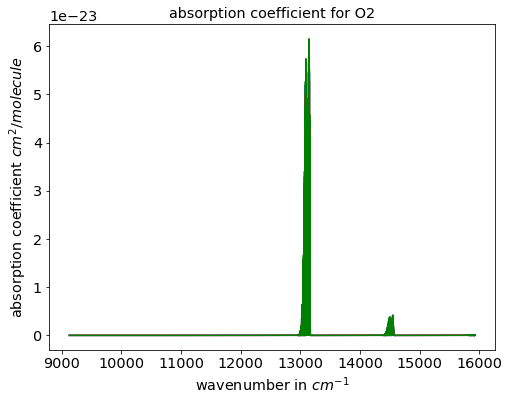

In [23]:
plt.plot(nu_us,coef_us,'b-')
plt.plot(nu_mw,coef_mw,'r-')
plt.plot(nu_ms,coef_ms,'g-')
plt.title('absorption coefficient for O2')
plt.xlabel('wavenumber in $cm^{-1}$')
plt.ylabel('absorption coefficient $cm^{2}/molecule $')

(500, 1000)

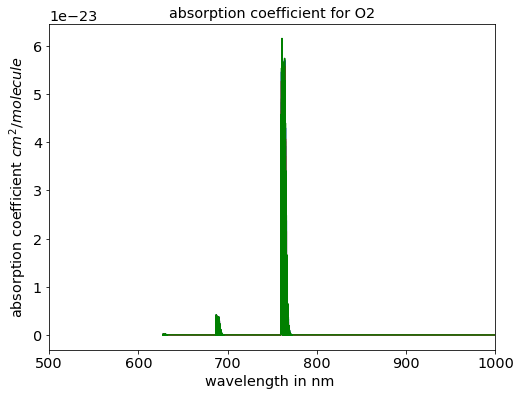

In [24]:
plt.plot(1e7/nu_us,coef_us,'b-')
plt.plot(1e7/nu_mw,coef_mw,'r-')
plt.plot(1e7/nu_ms,coef_ms,'g-')
plt.title('absorption coefficient for O2')
plt.xlabel('wavelength in nm ')
plt.ylabel('absorption coefficient $cm^{2}/molecule $')
plt.xlim(500,1000)

## Absorption coefficient per length unit (cm)

- Here we need the absorption coefficent from Hapi and the H2O density from LibRadRran

In [25]:
coeff_us_l=coef_us*d_O2_us # in cm-1
coeff_mw_l=coef_mw*d_O2_mw # in cm-1
coeff_ms_l=coef_ms*d_O2_ms # in cm-1

In [26]:
nu_t_us,trans_us = transmittanceSpectrum(nu_us,coeff_us_l,Environment={'l': Distance_source_tel})
nu_t_mw,trans_mw = transmittanceSpectrum(nu_mw,coeff_mw_l,Environment={'l': Distance_source_tel})
nu_t_ms,trans_ms = transmittanceSpectrum(nu_ms,coeff_ms_l,Environment={'l': Distance_source_tel})

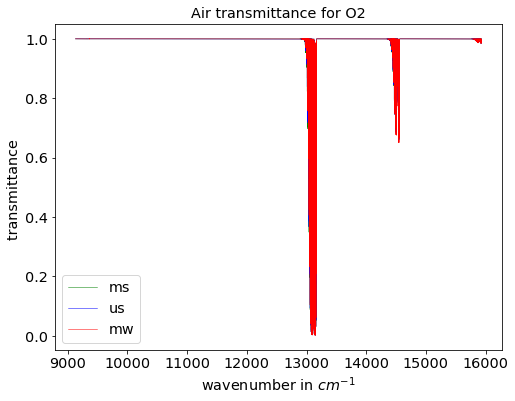

In [27]:
plt.plot(nu_t_ms,trans_ms,'g',lw=0.5,label='ms')
plt.plot(nu_t_us,trans_us,'b',lw=0.5,label='us')
plt.plot(nu_t_mw,trans_mw,'r',lw=0.5,label='mw')
plt.title('Air transmittance for O2')
plt.xlabel('wavenumber in $cm^{-1}$')
plt.ylabel('transmittance ')
plt.legend()

In [28]:
nu_t_us_smooth,trans_us_smooth,i1,i2,slit = convolveSpectrum(nu_t_us,trans_us,SlitFunction=SLIT_RECTANGULAR,Resolution=100.0)

In [29]:
nu_t_mw_smooth,trans_mw_smooth,i1,i2,slit = convolveSpectrum(nu_t_mw,trans_mw,SlitFunction=SLIT_RECTANGULAR,Resolution=100.0)

In [30]:
nu_t_ms_smooth,trans_ms_smooth,i1,i2,slit = convolveSpectrum(nu_t_ms,trans_ms,SlitFunction=SLIT_RECTANGULAR,Resolution=100.0)

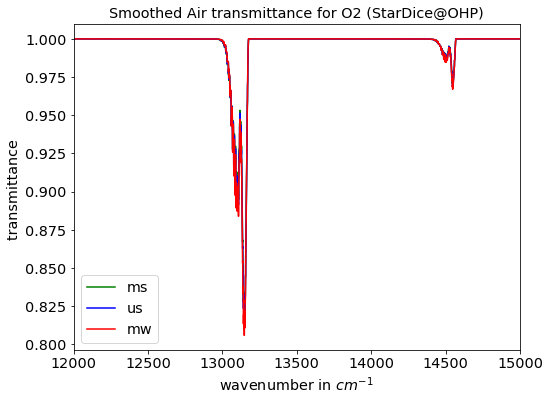

In [35]:
plt.plot(nu_t_ms_smooth,trans_ms_smooth,'g',label='ms')
plt.plot(nu_t_us_smooth,trans_us_smooth,'b',label='us')
plt.plot(nu_t_mw_smooth,trans_mw_smooth,'r',label='mw')
plt.title('Smoothed Air transmittance for O2 (StarDice@OHP)')
plt.xlabel('wavenumber in $cm^{-1}$')
plt.ylabel('transmittance ')
plt.xlim(12000.,15000.)
plt.legend()

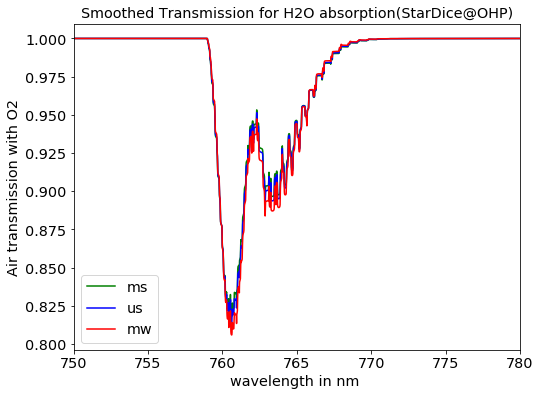

In [33]:
plt.plot(1e7/nu_t_ms_smooth,trans_ms_smooth,'g',label='ms')
plt.plot(1e7/nu_t_us_smooth,trans_us_smooth,'b',label='us')
plt.plot(1e7/nu_t_mw_smooth,trans_mw_smooth,'r',label='mw')
plt.title('Smoothed Transmission for H2O absorption(StarDice@OHP)')
plt.xlabel('wavelength in nm ')
plt.ylabel('Air transmission with O2')
plt.xlim(750,780)
plt.legend()